

Ejercicio 1: ¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?

Para la suma:

Se tiene que teniendo dos matrices de la misma dimensión, entonces $$A=(a_{ij})$$ $$B=(b_{ij})$$

Por lo tanto sumando ambas, la matriz suma quedaría, como: $$A+B=(a_{ij}+b_{ij})$$

Propiedades de la suma:

1) 

La suma de dos matrices de orden m x n es otra matriz de dimensión m x n.

2) Asociativa:

$$ A + (B + C) = (A + B) + C $$

3) Neutro aditivo:

$$ A + 0 = A $$

Sea 0 la matriz nula de misma dimensión que A.

4) Signo opuesto:

$$ A + (−A) = O $$

La matriz opuesta es aquella que sus elementos tienen signo contrario.

5) Conmutativa:

$$ A + B = B + A $$


Multiplicación:

Sea una matriz $A=(aij)$ y un número real c. El producto de un número real por una matriz:

$$ kA=(k a_{ij}) $$

Producto de matrices:

Dos matrices $A$ y $B$ son multiplicables si el número de columnas de $A$ coincide con el número de filas de $B$.

El elemento $c_{ij}$ de la matriz producto se obtiene multiplicando cada elemento de la fila $i$ de la matriz $A$ por cada elemento de la columna $j$ de la matriz $B$ y al final sumarlos.

Propiedades del producto de matrices:

1)Asociativa:

$$ A (B C) = (A B) C $$

2)Elemento neutro:

$$ A I = A $$

Donde I es la matriz identidad del mismo orden que A.

3)No es Conmutativa: No se obtienen el mismo resultado

$$ A B ≠ B A $$

4)Distributiva del producto con apoyo de la adición:

$$ A (B + C) = A B + A C $$


Ejercicio 2: ¿Como se define una matriz simétrica?

Una matriz simetrica se define como: $$ A = A^t $$


Una matriz es simétrica si es una matriz cuadrada, la cual tiene la característica de ser igual a su traspuesta. 

Ejercicio 3: ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Para poder hacer una matriz simetrica a partir de cualquier cuadrada basta con diagonalizarla. Entonces recordemos nuestro curso de Algebra lineal:

Definición:

una matriz cuadrada "A" se dice que es diagonalizable si es semejante a una matriz diagonal. Es decir, si mediante un cambio de base puede reducirse a una forma diagonal.

Condiciones que debe cumplir:

Es diagonalizable si y sólo si tiene $n$ vectores propios linealmente independientes asociados a valores propios reales.



Ejercicio 4: Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1 ; 1\\ -1 ; -1 \end{array} \right).$$

    Grafique la trayectoria en el espacio de fase.
    Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

Nota 1: El operador * funciona para multiplicar matrices.

Note 2: Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.


In [36]:
using PyPlot

In [37]:
function propagacion(x0,A,t0,tf,h,f)

    D=eigvals(A)
    w = eigvecs(A)
    t=[]
    Arreglo=[]
    push!(Arreglo,f(t0,x0))
    push!(t,t0)
    G(t)=w*diagm(exp.(D*t[length(t)]))*inv(w)
    S=[]
    push!(S,x0)
    while t[length(t)]<tf
        push!(t,t[length(t)]+h)
        push!(S,G(t[length(t)])*x0)
        push!(Arreglo,f(t[length(t)],S[length(S)]))
    end
    return S,t,Arreglo
    
    end
    

propagacion (generic function with 1 method)

In [38]:
function Dios(a,b,c,d)
    A= [a b; c d]
return A
end

Dios (generic function with 1 method)

In [39]:
comp1(x)=x[1]
comp2(x)=x[2]

comp2 (generic function with 1 method)

In [46]:
dx=comp1.(propagacion([1,2],[-1 1; -1 -1],0,10,0.1,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[3])
dy=comp2.(propagacion([1,2],[-1 1; -1 -1],0,10,0.1,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[3])

102-element Array{Number,1}:
           -3     
    -2.79128+0.0im
    -2.56989+0.0im
    -2.34212+0.0im
    -2.11325+0.0im
    -1.88763+0.0im
    -1.66874+0.0im
    -1.45934+0.0im
    -1.26148+0.0im
    -1.07666+0.0im
   -0.905858+0.0im
   -0.749624+0.0im
   -0.608145+0.0im
            ⋮     
 0.000286468+0.0im
 0.000281852+0.0im
 0.000272972+0.0im
 0.000260762+0.0im
 0.000246046+0.0im
 0.000229546+0.0im
 0.000211882+0.0im
 0.000193586+0.0im
 0.000175103+0.0im
 0.000156801+0.0im
  0.00013898+0.0im
 0.000121874+0.0im

In [47]:
x=comp1.(propagacion([1,2],[-1 1; -1 -1],0,10,0.1,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[1])
y=comp2.(propagacion([1,2],[-1 1; -1 -1],0,10,0.1,(t,y)->[-1 1; -1 -1]*[y[1],y[2]])[1])

102-element Array{Number,1}:
             2     
       1.7103+0.0im
      1.44216+0.0im
      1.19653+0.0im
     0.973776+0.0im
     0.773775+0.0im
     0.596025+0.0im
      0.43971+0.0im
     0.303772+0.0im
     0.186979+0.0im
    0.0879723+0.0im
   0.00532091+0.0im
   -0.0624447+0.0im
             ⋮     
 -0.000275744+0.0im
 -0.000247289+0.0im
 -0.000219516+0.0im
 -0.000192805+0.0im
 -0.000167447+0.0im
 -0.000143655+0.0im
 -0.000121576+0.0im
   -0.0001013+0.0im
  -8.28654e-5+0.0im
   -6.6273e-5+0.0im
  -5.14891e-5+0.0im
  -3.84532e-5+0.0im

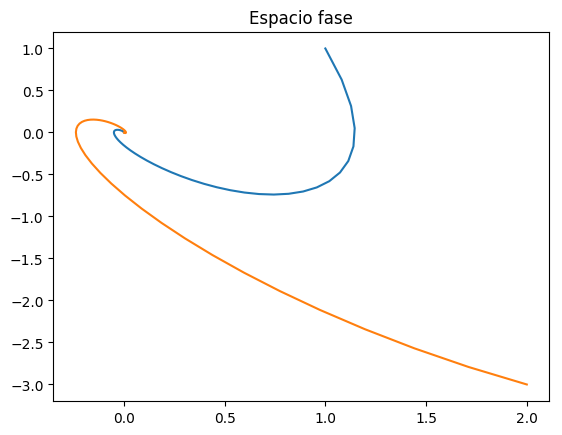

PyObject <matplotlib.text.Text object at 0x7f4d35266310>

In [48]:
plot(x,dx)
plot(y,dy)
title("Espacio fase")